In [1]:
import os
import random
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
print(len(os.listdir('datasets/script_dir/script')))
print(len(os.listdir('datasets/script_dir/noscript')))

198
1056


In [3]:
Categories=["noscript","script"]
data_arr=[]
target_arr=[]
datadir='datasets/script_dir/'

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (1, 1), activation='relu', input_shape=(300, 70, 3)),
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=tf.keras.metrics.Precision())
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 300, 70, 16)       64        
                                                                 
 conv2d_106 (Conv2D)         (None, 298, 68, 32)       4640      
                                                                 
 batch_normalization_21 (Bat  (None, 298, 68, 32)      128       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 298, 68, 32)       0         
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 149, 34, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 147, 32, 32)     

In [67]:
DIR = "barcode_dir/"
datagen = ImageDataGenerator(rescale=1.0/255.)
generator = datagen.flow_from_directory(datadir, batch_size=32, class_mode='binary', target_size=(300, 70))
labels = list(generator.class_indices.keys())
print(labels)

Found 2345 images belonging to 2 classes.
['noscript', 'script']


In [68]:
history = model.fit(generator,epochs=20,verbose=1)

Epoch 1/20
74/74 [==============================] - 9s 88ms/step - loss: 0.6392 - precision_7: 0.7391
Epoch 2/20
74/74 [==============================] - 7s 98ms/step - loss: 0.2732 - precision_7: 0.8313
Epoch 3/20
74/74 [==============================] - 7s 94ms/step - loss: 0.2404 - precision_7: 0.8521
Epoch 4/20
74/74 [==============================] - 6s 81ms/step - loss: 0.2272 - precision_7: 0.8622
Epoch 5/20
74/74 [==============================] - 6s 81ms/step - loss: 0.2274 - precision_7: 0.8747
Epoch 6/20
74/74 [==============================] - 6s 80ms/step - loss: 0.1937 - precision_7: 0.8844
Epoch 7/20
74/74 [==============================] - 6s 79ms/step - loss: 0.1792 - precision_7: 0.9021
Epoch 8/20
74/74 [==============================] - 6s 82ms/step - loss: 0.1939 - precision_7: 0.8966
Epoch 9/20
74/74 [==============================] - 6s 80ms/step - loss: 0.1631 - precision_7: 0.8988
Epoch 10/20
74/74 [==============================] - 6s 80ms/step - loss: 0.1513 -

In [69]:
image_list = os.listdir('datasets/script_dir/script/')
image_list = ['datasets/script_dir/script/'+ i for i in image_list ]
ln1 = len(image_list)
image_list1 = os.listdir('datasets/script_dir/noscript/')
image_list1 = ['datasets/script_dir/noscript/'+ i for i in image_list1 ]
ln2 = len(image_list1)
s1= 0
for im in image_list:
    image = cv2.imread(im)
    clip = cv2.resize(image, (300,70), interpolation = cv2.INTER_AREA)
    c = np.reshape(clip,(1,300,70,3))
    prob = model.predict(c,verbose=0)
    if prob[0] < 0.5:
        s1 = s1 + 1
print(s1/ln1)
s2= 0
for im in image_list1:
    image = cv2.imread(im)
    clip = cv2.resize(image, (300,70), interpolation = cv2.INTER_AREA)
    c = np.reshape(clip,(1,300,70,3))
    prob = model.predict(c,verbose=0)
    if prob[0] > 0.5:
        s2 = s2 + 1
print(s2/ln2)
s = (s1 + s2)/(ln1+ln2)
print(int(s*100),end="%")

0.9845938375350141
0.026364193746167996
31%

In [50]:
model.save("assets/models/script classifierv2")

INFO:tensorflow:Assets written to: script classifierv2\assets


INFO:tensorflow:Assets written to: script classifierv2\assets


In [36]:
def show2(im1,im2):
    fig = plt.figure(figsize=(15, 10))
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(im1)
    plt.title("image1")
    plt.axis('off')
    fig.add_subplot(rows, columns, 2)
    plt.imshow(im2,cmap ='gray')
    plt.title("image1")
    plt.axis('off')

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [80]:
def white_patch(image, boxes):
    im = np.zeros(image.shape)
    for box in boxes:
        (startX, startY, endX, endY) = box
        cv2.rectangle(im,(startX, startY),(endX, endY),(255,255,255),-1)
    return im

In [82]:
image = cv2.imread("testing2.png")
h,w = image.shape[:2]
r = h/w
w = 1024
h= int(w*r)
image =  cv2.resize(image, (w,h),interpolation = cv2.INTER_AREA)

In [106]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))
gray1 = cv2.GaussianBlur(gray, (3, 3), 0)
gray2 = cv2.morphologyEx(gray1, cv2.MORPH_BLACKHAT, kernel)
gray3 = cv2.Sobel(gray2, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(gray3)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad1 = (grad - minVal) / (maxVal - minVal)
grad2 = (grad1 * 255).astype("uint8")
grad3 = cv2.morphologyEx(grad2, cv2.MORPH_CLOSE, kernel)
thresh = cv2.threshold(grad3, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh1 = cv2.dilate(thresh, None, iterations=3)

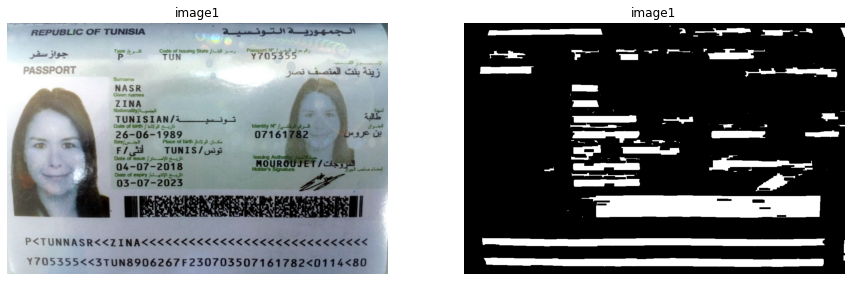

In [107]:
show2(image, thresh)

In [108]:
def traditional_ROI_extraction(image):
    im_h,im_w = image.shape[:2]
    cnts = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    boxes = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        if (h*w > 500):
            (xstart,ystart,xend,yend)=(x,y,x+w,y+h)
            boxes.append((xstart,ystart,xend,yend))
    return boxes

In [109]:
boxes = traditional_ROI_extraction(thresh1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'image1')

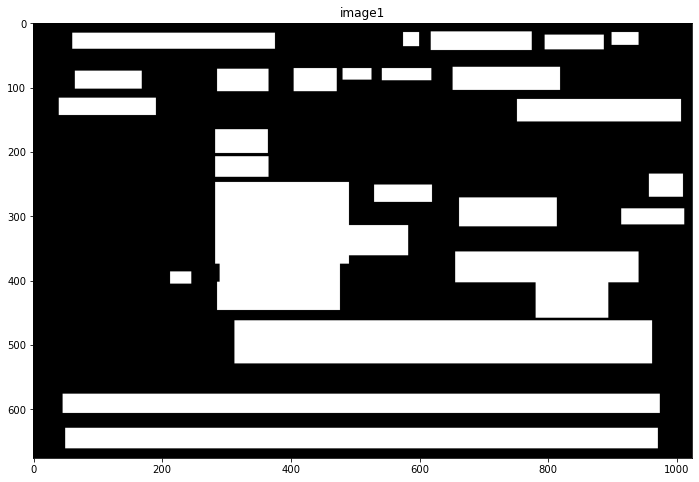

In [110]:
r=white_patch(image, boxes)
fig = plt.figure(figsize=(12, 8))
plt.imshow(r)
plt.title("image1")

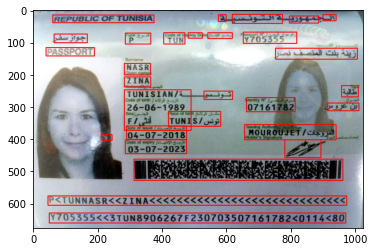

In [111]:
def drawROIs(image,boxes):
    im = image.copy()
    for box in boxes:
        (startX, startY, endX, endY) = box
        cv2.rectangle(im,(startX, startY),(endX, endY),(255,0,0),2)
    return im
plt.imshow(drawROIs(image,boxes))